# Exercise Set 4: Jacob Cardinal Tremblay, Charchit Kumar Sethi, and Sachin Pradeep Etakkepravan Thulicheri

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as st

*****1. Samples & Sampling Simulation [60 points]*****

Write a numerical simulation code that reproduces the behaviour of the following simulation.
Draw N samples of size n from a population with µ = 5 and σ = 1. Compute the confidence
intervals (CI) of each sample distribution and the sampling distribution and visualize it in a similar
manner. Test your simulation against your theoretical expectations. Make sure to test your result
and to confirm that the result is as expected. (i.e. About 5 % of the samples not overlapping with
the confidence interval, or 5% of all simulations with the population mean not part of the confidence
interval.) **60 Points**


In [2]:
# Set parameters
size = 1000
mu = 5
std = 1

# Create a population from a distribution
population = np.random.normal(mu, std, size)

In [3]:
# Create a function to compute the confidence intervals
def CI(x, n):
    # Compute mean and std
    mu = np.mean(x)
    sig = np.std(x)
    # For a confidence level of 0.95, z = 1.96
#     z = 1.96
    
#     lowerCI = mu - z*(sig / np.sqrt(n))
#     upperCI = mu + z*(sig / np.sqrt(n))
#     lowerCI = mu - z*(st.sem(x))
#     upperCI = mu + z*(st.sem(x))
    lowerCI, upperCI = st.t.interval(0.95, n, loc=mu, scale=sig)
    
    return lowerCI, upperCI

In [4]:
def CI_percentage(x, low, up):
    t1= x[x > up]
    t2 = x[x < low]
    return (len(t1)+len(t2)) / len(x)

For sample 1, percentage of sample not in the confidence interval : 0.02
For sample 2, percentage of sample not in the confidence interval : 0.04
For sample 3, percentage of sample not in the confidence interval : 0.02
For sample 4, percentage of sample not in the confidence interval : 0.04
For sample 5, percentage of sample not in the confidence interval : 0.06
For sample 6, percentage of sample not in the confidence interval : 0.06
For sample 7, percentage of sample not in the confidence interval : 0.04
For sample 8, percentage of sample not in the confidence interval : 0.04
For sample 9, percentage of sample not in the confidence interval : 0.04
For sample 10, percentage of sample not in the confidence interval : 0.02


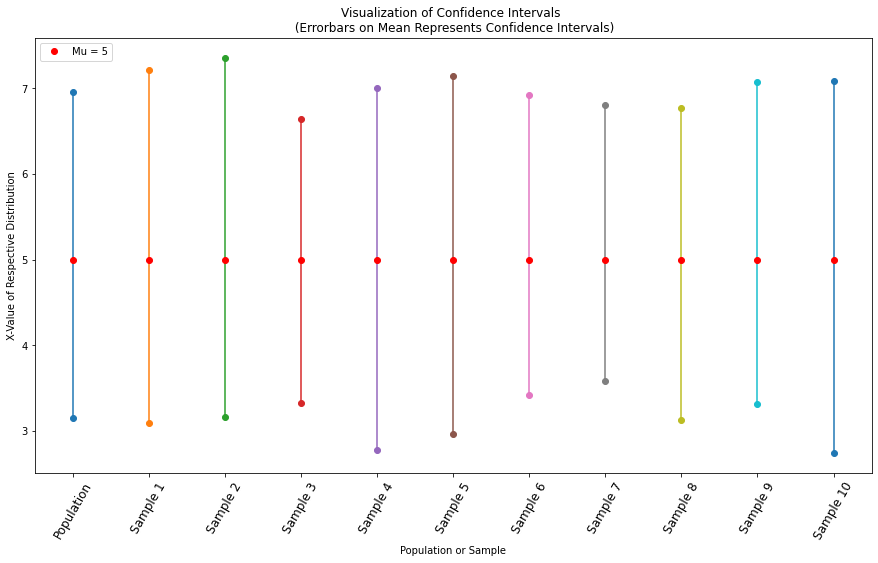

In [5]:
#Number of samples
N = 10
#Sample size
n = 50

#Plot the Population distribution first
pop_lowCI, pop_upCI = CI(population, len(population))
plt.figure(figsize=(15, 8))
plt.plot((0, 0), (pop_lowCI, pop_upCI), 'o-')
plt.plot(0, mu, 'o', color='r', label = "Mu = 5")
plt.legend(loc="upper left")

#Go through every number of samples
for i in range(N):
    # Numpy choice function relies on uniform probabilities, 
    # which mean that all values in the array passed as parameters have the same chances of being picked
    # It will not influence our gaussian population
    #Replace is false so that there are no object in the population which are selected twice.
    sample = np.random.choice(population, n, replace = False)
    
    lowCI, upCI = CI(sample, n)
    print(f"For sample {i+1}, percentage of sample not in the confidence interval : {CI_percentage(sample, lowCI, upCI)}")
    
    #Plot the data
    plt.plot((i+1, i+1), (lowCI, upCI), 'o-')
    plt.plot(i+1, mu, 'o', color='r')
    
xlbl = ["Population"] + [f"Sample {i}" for i in np.arange(1, N+1)]
plt.xticks(np.arange(N+1), xlbl, rotation = 60, fontsize = 12)
plt.ylabel('X-Value of Respective Distribution')
plt.xlabel('Population or Sample')
plt.title('Visualization of Confidence Intervals \n (Errorbars on Mean Represents Confidence Intervals)')
plt.show()

Our population is as expected, with the highest point at 5 (mu), and a nice bell curve. The behaviour for the samples is also acting as expected, since we are seeing an approximately Gaussian distribution in every sample. Since we choose 10 samples of each of sample size 50, the sample size is much smaller than our population (size of 1000). This means that we will find the same general gaussian shape in our distribution, but with some difference due to the randomness of the sample. One could have chosen to plot this data as 11 seperate Gaussian functions with their confidence interval overlaid, however, this would most likely overload the reader with too much information and would not present the data in a clear and concise way. Instead, we clearly represent the values by giving the mean where the "error bars" represent the confidence intervals. This shows all the relevant data on a single plot, and clearly represents the trends that are asked for in this question. 

We can then compute the confidence interval of each of our samples and the sampling distribution using a function based on:

\begin{equation}
CI = \bar{x} \pm z \frac{s}{\sqrt{n}}.
\end{equation}

Where $CI$ is the confidence interval, $\bar{x}$ is the sample mean, $z$ is the confidence level value, $s$ is the sample standard deviation, and $n$ is the sample size.

The confidence intervals are also acting as expected, as they show bigger variations for the samples than for the population. We also see that they agree with the theoretical results, as about 5% of the samples are not overlapping with the confidence interval.

*****2. Poisson Statistics  [40 points]*****

Perseids are a meteor showers associated with the comet Swift–Tuttle. In astronomy, the zenithal hourly rate (ZHR) of a meteor shower is the number of meteors a single observer would see in an hour of peak activity. Assume that today the Perseids have a ZHR = 120. Assume that the occurrence of every single meteor is distributed according to Poisson statistics.

In [6]:
#Define a function for the poisson distribution.
def poisson(mu, k):
    return ((mu**k)/math.factorial(k))*np.exp(-mu)

a. Find the probability that no meteor is observed during a given minute

In [7]:
k = 0 # Number of successes for which we wantto find the probability
# k=0 because we want the probability for no meteor observed
mu = 2 # 120 / 60 because we want rate per minute instead of rate per hour
p = poisson(mu, k) # Poisson probability function

print(f"The approximate probability to not see any meteor in one given minute is {str(round(p, 4))}")

The approximate probability to not see any meteor in one given minute is 0.1353


b. What is the expected number of meteors occurring in two minutes

In [8]:
120 / 30

4.0

Because the distribution can scale to any given timescale, we can simply take the given rate and apply it for the case of two minutes. For an hour, the expected number of meteors we can see is 120, so the expected number of meteors for 2 minutes is 120 / (60 / 2) = 4.

c. Find the probability that this expected number actually are observed in a given two-minute period.

In [9]:
k = 4 # Expected number
mu = 4 # rate for 2 minutes
p = poisson(mu, k) # Poisson probability function

print(f"The approximate probability to see 4 meteors in a given 2-minute period is {str(round(p, 4))}")

The approximate probability to see 4 meteors in a given 2-minute period is 0.1954


So the approximate probability to see 4 meteors using a poisson distribution is about 20%. 

d. Plot a histogram of the probabilities for the number of meteors for each 2 minute period.

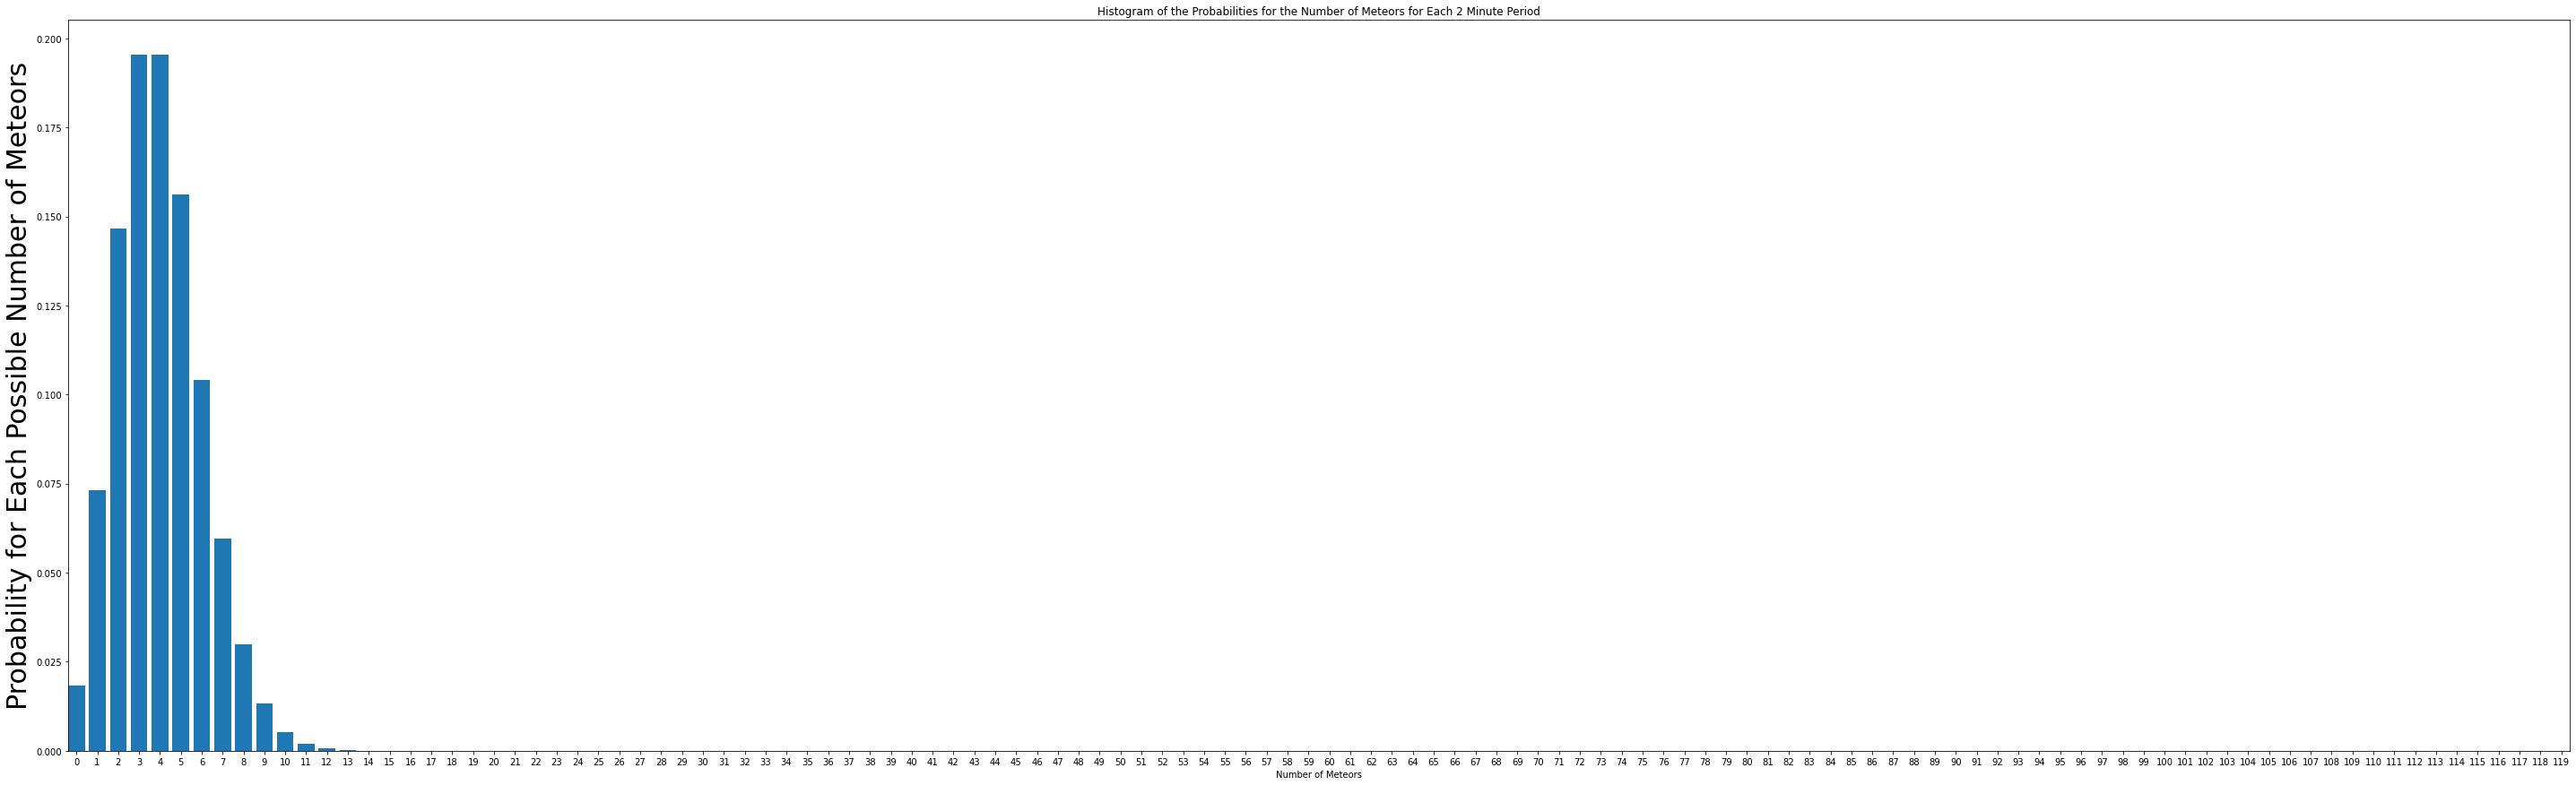

In [10]:
mu = 4 #rate of meteors for 2 minutes
meteor_number = []
meteor_prob = []

#Use a for loop to determine the probability of seeing 0-120 meteors
for k in np.arange(0, 120):
    p = poisson(mu, k)
    meteor_prob.append(p)
    meteor_number.append(k)

#Plot the data
plt.figure(figsize=(50, 15))
plt.bar(meteor_number, meteor_prob)
plt.xticks(meteor_number)
plt.title('Histogram of the Probabilities for the Number of Meteors for Each 2 Minute Period')
plt.ylabel("Probability for Each Possible Number of Meteors", fontsize = 30)
plt.xlabel("Number of Meteors")
plt.margins(x=0)
plt.show()

Each two-minute period have the same probability distribution for the possible number of meteors. For completeness here, we show the entire x-axis. However, we see that the probability past ~16 is extremely low, therefore, to help the tutor read the axis, we will create another plot below, where we zoom in.

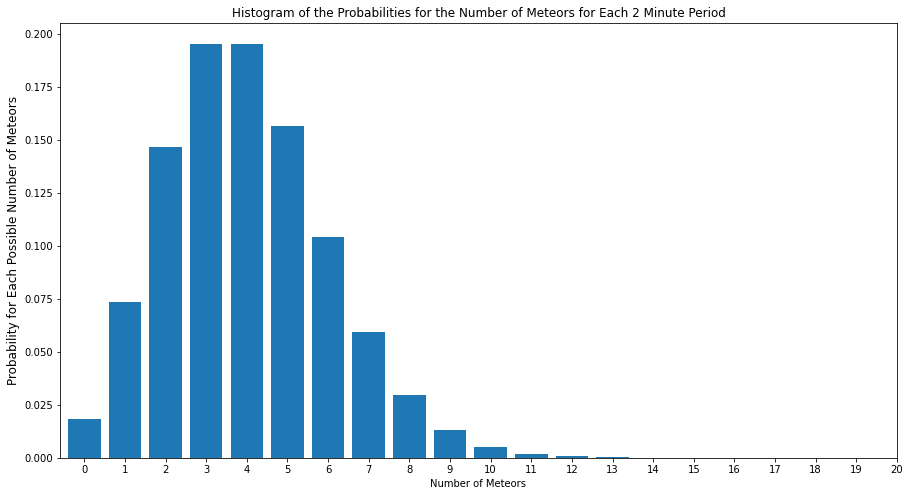

In [11]:
mu = 4 #rate of meteors for 2 minutes
meteor_number = []
meteor_prob = []

#Use a for loop to determine the probability of seeing 0-120 meteors.
for k in np.arange(0, 120):
    p = poisson(mu, k)
    meteor_prob.append(p)
    meteor_number.append(k)

#Plot the data
plt.figure(figsize=(15, 8))
plt.bar(meteor_number, meteor_prob)
plt.xticks(meteor_number)
plt.title('Histogram of the Probabilities for the Number of Meteors for Each 2 Minute Period')
plt.ylabel("Probability for Each Possible Number of Meteors", fontsize = 12)
plt.xlabel("Number of Meteors")
plt.xlim(xmin=-0.6, xmax = 20)
plt.margins(x=0)
plt.show()

The question asks to plot a histogram of the probabilities for the number of meteors for each 2 minute period. However, since each two minute period will have the same probability to see a certain number of meteors, each 2 minute period can be described by a single histogram.